# Using `coordinates` and `table` to match and compare catalogs.
<img src='images/logo.png' width=200px align='right'>

In this exercise we will have more fun with astronomical coordinates using `astropy.coordinates`.

At the end the last notebook, we determined that HCG7 is in the SDSS imaging survey, so that means we can use the cells below to download catalogs of objects directly from the SDSS. Later on, we will match this catalog to another catalog covering the same field, allowing us to make plots using the combination of the two catalogs.

In [49]:
# Tools for connecting with web servers
import urllib
# Utilities for displaying images in jupyter notebooks
import IPython.display
# Numpy, what else can I say?
import numpy as np

In [50]:
# Display images in the browser window
%matplotlib inline
# Matplotlib, what else can I say?
from matplotlib import pyplot as plt

In [51]:
# Utilities particular to astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astroquery.sdss import SDSS

We will access the SDSS SQL database using the [astroquery](https://astroquery.readthedocs.org) affiliated package.  This will require an internet connection and a working install of astroquery. If you don't have these you can just skip down two cells, because the data files are provided with the repository. Depending on your version of astroquery it might also issue a warning, which you should be able to safely ignore.

In [78]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')

In [53]:
# sdss = SDSS.query_region(coordinates=hcg7_center, radius=20*u.arcmin, 
#                          spectro=True, 
#                          photoobj_fields=['ra','dec','u','g','r','i','z'])

`astroquery` queries gives us back an [`astropy.table.Table` object](http://docs.astropy.org/en/stable/table/index.html).  We could just work with this directly without saving anything to disk if we wanted to.  But here we will use the capability to  write to disk.  That way, if you quit the session and come back later, you don't have to run the query a second time.

(Note that this won't work fail if you skipped the last step.  Don't worry, you can just skip to the next cell with ``Table.read`` and use the copy of this table included in the tutorial.)

In [54]:
sdss = Table.read('data/HCG7_SDSS_photo.dat', format='ascii')

In [55]:
ssds.write('data/HCG7_SDSS_photo.dat', format='ascii', overwrite=True)

If you don't have internet, you can read the table into python by running the cell below.  But if you did the astroquery step above, you could skip this, as the table is already in memory as the `sdss` variable.

Ok, so we have a catalog of objects we got from the SDSS.  Now lets say you have your own catalog of objects in the same field that you want to match to this SDSS catalog.  In this case, we will use a catalog extracted from the [2MASS](http://www.ipac.caltech.edu/2mass/).  We first load up this catalog into python.

In [56]:
twomass = Table.read('data/HCG7_2MASS.tbl', format='ascii')

Now to do matching we need `SkyCoord` objects.  We'll have to build these from the tables we loaded, but it turns out that's pretty straightforward: we grab the RA and dec columns from the table and provide them to the `SkyCoord` constructor.  Lets first have a look at the tables to see just what everything is that's in them.

In [57]:
sdss # just to see an example of the format

ra,dec,u,g,r,i,z
float64,float64,float64,float64,float64,float64,float64
9.48301378408814,1.01446279778812,23.51845,22.13895,20.82912,19.92155,19.47135
9.48341569139689,0.976399855054926,22.81118,22.03554,22.10897,22.14101,21.64411
9.48404442918999,0.668844321347565,21.08944,18.71639,17.1889,15.90083,15.19136
9.48407695277552,1.19045532333533,23.89431,22.32235,21.00772,19.96612,19.64056
9.48440312780167,1.16365522098835,21.36359,20.86403,20.86694,20.54494,20.98261
9.48516597211733,1.06970371044418,19.19686,17.4415,16.72897,16.46968,16.34503
9.48663932955685,0.650341053923046,25.78184,22.76056,21.43424,20.43382,19.79225
9.48670915066737,0.571826270065982,21.13963,18.75032,17.70842,17.32286,17.07478
9.48841923342013,0.594765107669862,23.21057,25.03088,21.79477,20.54489,19.51502


In [58]:
twomass # just to see an example of the format

designation,ra,dec,r_k20fe,j_m_k20fe,j_msig_k20fe,j_flg_k20fe,h_m_k20fe,h_msig_k20fe,h_flg_k20fe,k_m_k20fe,k_msig_k20fe,k_flg_k20fe,k_ba,k_phi,sup_ba,sup_phi,r_ext,j_m_ext,j_msig_ext,h_m_ext,h_msig_ext,k_m_ext,k_msig_ext,cc_flg,dist,angle
,deg,deg,arcsec,mag,mag,,mag,mag,,mag,mag,,,deg,,deg,arcsec,mag,mag,mag,mag,mag,mag,,arcsec,deg
str16,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64
00402069+0052508,10.086218,0.880798,9.4,13.835,0.068,0,13.01,0.086,0,12.588,0.089,0,0.8,70,0.82,35,18.62,13.632,0.088,12.744,0.104,12.398,0.105,0,972.120611,91.538952
00395984+0103545,9.99935,1.06514,12.9,12.925,0.035,0,12.183,0.042,0,11.89,0.067,0,0.8,35,0.7,40,35.9,12.469,0.048,11.91,0.066,11.522,0.087,0,916.927636,45.951861
00401849+0049448,10.077062,0.82913,6.0,14.918,0.086,0,14.113,0.107,0,13.714,0.103,0,0.6,-15,1.0,90,11.35,14.631,0.121,13.953,0.169,13.525,0.161,0,962.489231,102.73149
00395277+0057124,9.969907,0.953472,5.3,14.702,0.049,0,14.248,0.069,0,13.899,0.095,0,0.6,-60,0.44,-50,10.59,14.62,0.144,14.15,0.296,13.73,0.2,0,601.136444,66.93659
00401864+0047245,10.077704,0.790143,7.6,15.585,0.134,1,15.003,0.18,1,14.049,0.142,1,0.5,30,0.46,30,14.48,14.977,0.138,14.855,0.303,13.653,0.18,0,1004.982128,110.53147
00393485+0051355,9.895219,0.859882,39.3,11.415,0.031,3,10.755,0.044,3,10.514,0.068,3,0.6,-30,0.7,-60,92.29,11.415,0.018,10.155,0.054,9.976,0.085,0,301.813395,109.639102
00392964+0103495,9.873526,1.063769,10.9,14.463,0.065,0,13.618,0.067,0,13.258,0.091,0,0.4,55,0.28,60,20.35,14.2,0.086,13.363,0.091,13.101,0.133,0,665.301415,18.051526
00403343+0049079,10.139293,0.818865,5.0,15.484,0.15,0,--,--,--,13.97,0.137,0,1.0,90,1.0,90,10.05,15.035,0.183,14.725,0.0,13.654,0.189,0,1189.207905,102.088788


OK, looks like they both have ``ra`` and ``dec`` columns, so we should be able to use that to make `SkyCoord`s.

You might first think you need to create a separate `SkyCoord` for *every* row in the table, given that up until now all `SkyCoord`s we made were for just a single point.  You could do this, but it will make your code much slower.  Instead, `SkyCoord` supports *arrays* of coordinate values - you just pass in array-like inputs (array `Quantity`s, lists of strings, `Table` columns, etc.), and `SkyCoord` will happily do all of its operations element-wise.

In [59]:
coo_sdss = SkyCoord(sdss['ra']*u.deg, sdss['dec']*u.deg)
coo_twomass = SkyCoord(twomass['ra'], twomass['dec'])

Note a subtle difference here: you had to give units for SDSS but *not* for 2MASS.  This is because the 2MASS table has units associated with the columns, while the SDSS table does not (so you have to put them in manually).

Now we simply use the ``SkyCoord.match_to_catalog_sky`` method to match the two catalogs. Note that order matters: we're matching 2MASS to SDSS because there are many *more* entires in the SDSS, so it seems likely that most 2MASS objects are in SDSS (but not vice versa).

In [60]:
idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)

``idx`` are the indecies into ``coo_sdss`` that get the closest matches, while ``d2d`` and ``d3d`` are the on-sky and real-space distances between the matches. In our case ``d3d`` can be ignored because we didn't give a line-of-sight distance, so its value is not particularly useful.   But ``d2d`` provides a good diagnosis of whether we actually have real matches:

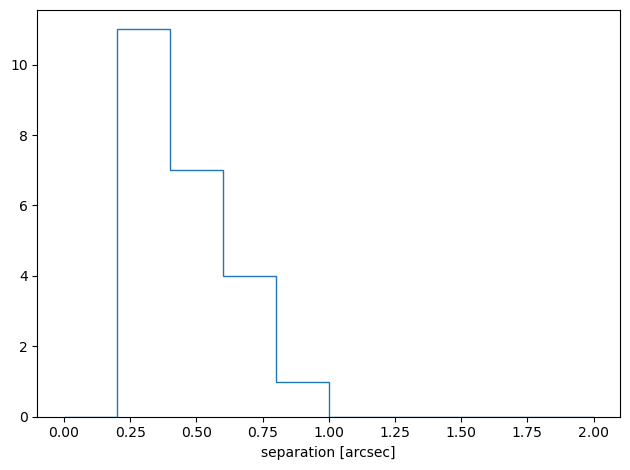

In [61]:
plt.hist(d2d_sdss.arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

Alright, great - looks like randomly placed sources should be more like an arc*minute* away, so we can probably trust that our earlier matches which were within an arc*second* are valid.  So with that in mind, we can start computing things like colors that combine the SDSS and 2MASS photometry.

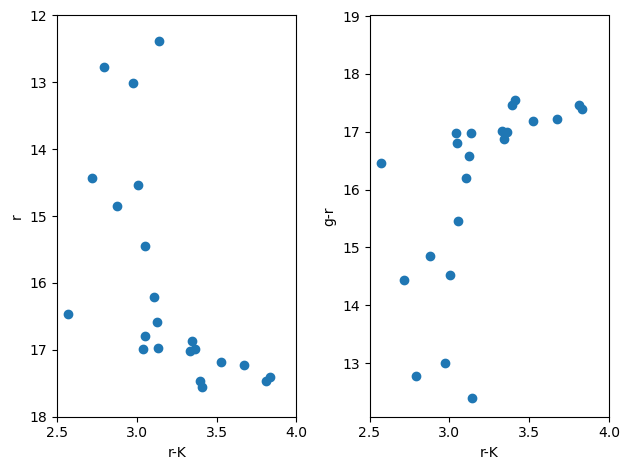

In [62]:
rmag = sdss['r'][idx_sdss]
grcolor = sdss['g'][idx_sdss] - rmag
rKcolor = rmag - twomass['k_m_ext']

plt.subplot(1, 2, 1)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.xlim(2.5, 4)
plt.ylim(18, 12) #mags go backwards!

plt.subplot(1, 2, 2)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('g-r')
plt.xlim(2.5, 4)

plt.tight_layout()

For more on what matching options are available, check out the [separation and matching section of the astropy documentation](http://astropy.readthedocs.org/en/latest/coordinates/matchsep.html).  Or for more on what you can do with `SkyCoord`, see [its API documentation](http://astropy.readthedocs.org/en/latest/api/astropy.coordinates.SkyCoord.html).

### Exercises

Check that the separations in the ``d2d_sdss`` object matches the on-sky separations you get from comparing the appropriate elements of ``coo_sdss`` to the ``coo_twomass``. (Recall that the "appropriate elements" have already been determined above.  Be sure to re-use that!) 

Hint: You'll likely find the [``SkyCoord.separation()``](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.separation) method useful here.

Text(0.5, 0, 'Separation [arcsec] between SDSS and 2MASS')

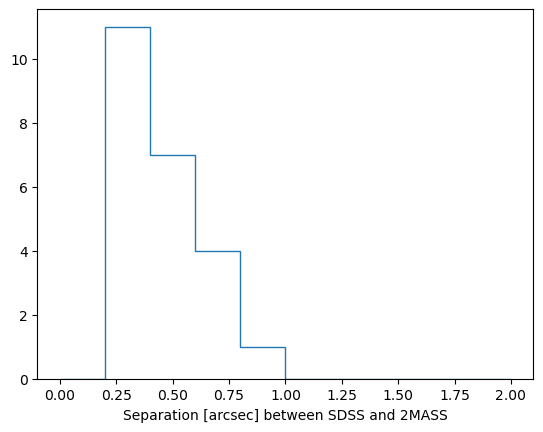

In [77]:
coo_sep = SkyCoord.separation(coo_sdss[idx_sdss], coo_twomass)

plt.hist(coo_sep.arcsec, histtype='step', range=(0,2))
plt.xlabel('Separation [arcsec] between SDSS and 2MASS')

Use the `SkyCoord` you created at the start of the last exercise: what is its on-sky separation from the center of HCG7?

In [93]:
boomerang = SkyCoord.from_name('Boomerang Nebula')

sep2 = hcg7_center.separation(boomerang) #Another way to do it
print(f"{sep2.deg} degrees")

126.35578736854853 degrees
